In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import peakutils
from peakutils.plot import plot as pplot

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [78]:
data = pd.read_table('data/OpenBCI-RAW-BaGELS_sEBR_9053.txt', sep=',', skiprows=6, header=None)
data.head()

,0,1,2,3,4,5,6,7,8
0,0,-776.29,-479.14,-1365.55,-1613.25,0.0,0.0,0.0,13:01:46.512
1,1,-775.83,-490.84,-1366.45,-1599.74,0.0,0.0,0.0,13:01:46.526
2,2,-794.01,-481.34,-1361.83,-1598.90,0.0,0.0,0.0,13:01:46.526
3,3,-779.25,-470.74,-1356.21,-1600.03,0.0,0.0,0.0,13:01:46.540
4,4,-771.63,-482.24,-1361.44,-1609.11,0.0,0.0,0.0,13:01:46.540


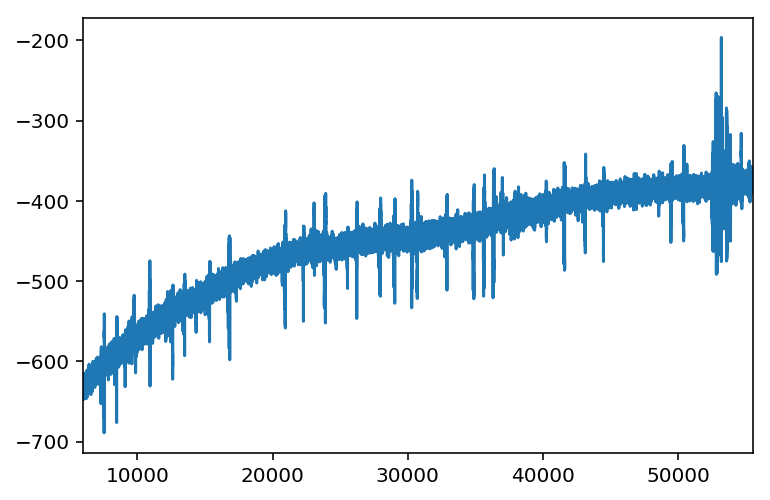

In [79]:
data[1].iloc[6000:-6000].plot()

In [80]:
x = np.arange(len(data[1].iloc[6000:-6000]))
y = data[1].iloc[6000:-6000]

In [102]:
x = np.arange(len(data[1].iloc[6000:9000]))
y = data[1].iloc[6000:9000]

y_mean = data[1].iloc[6000:9000].rolling(window=200).mean()
y_stationary = y - y_mean

y_fft = np.fft.fft(y_stationary[200:])
y_fft[0:1] = 0
y_fft[100:] = 0
y_ifft = np.fft.ifft(y_fft)

//anaconda/envs/Py3.5/lib/python3.5/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


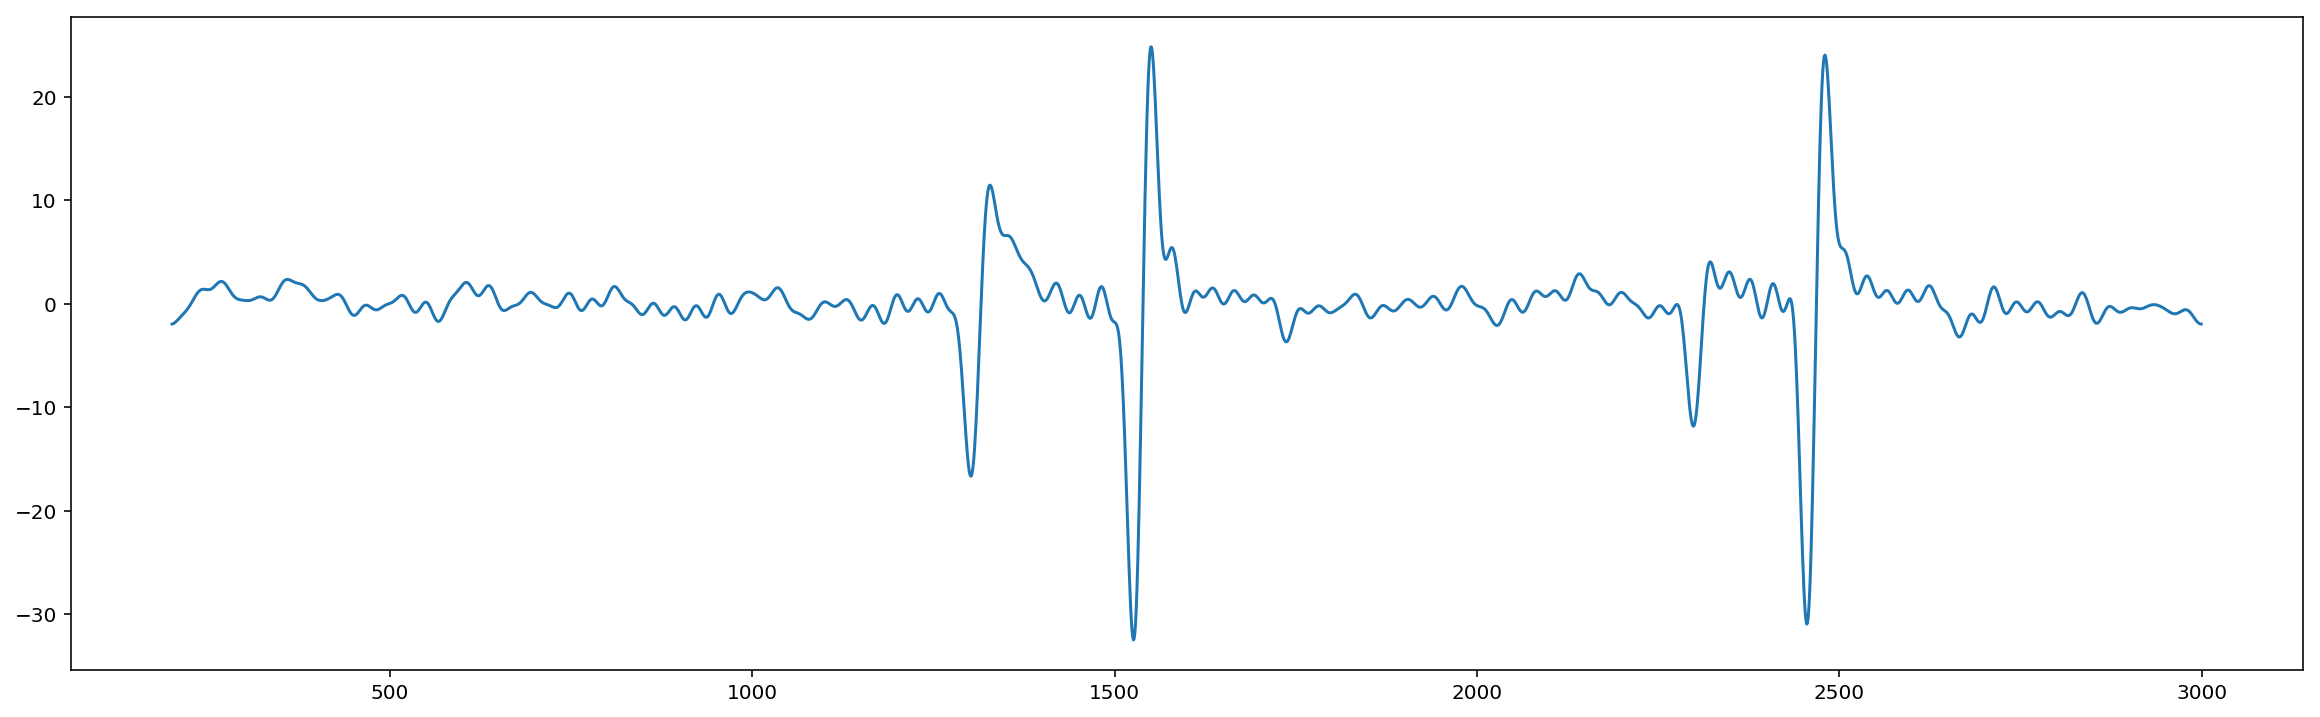

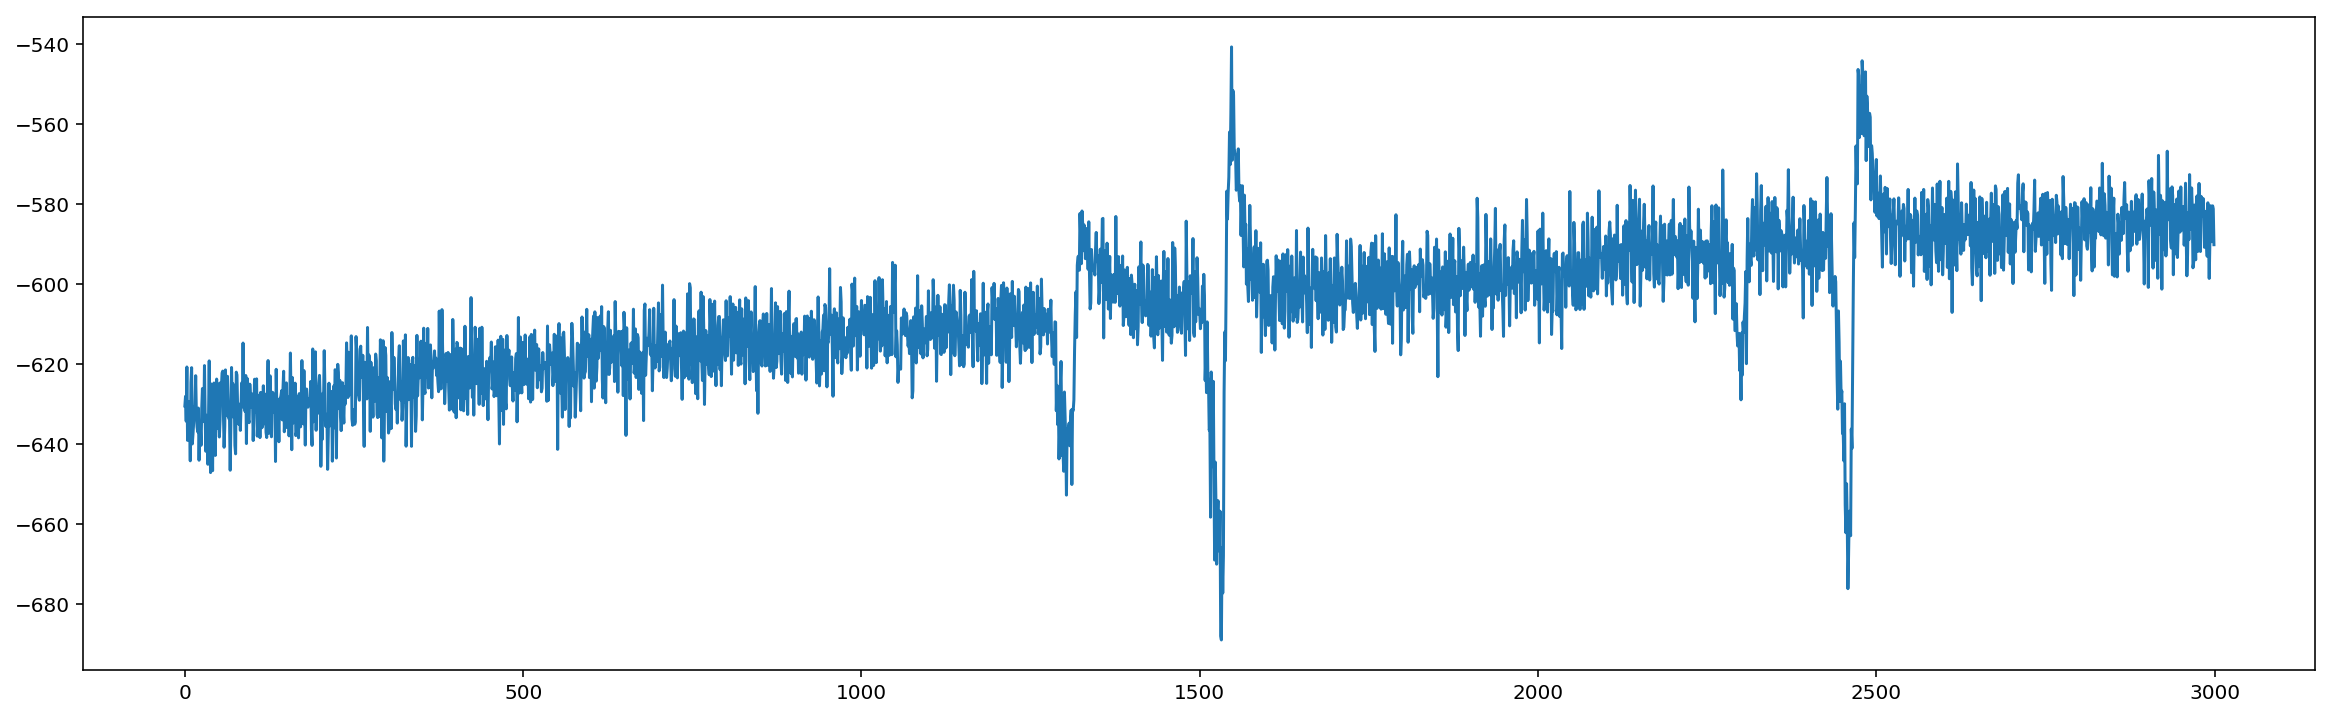

In [103]:
plt.figure(figsize=(20,6))
plt.plot(x[200:], y_ifft)
plt.figure(figsize=(20,6))
plt.plot(x, y)

In [104]:
indexes = peakutils.indexes(y_ifft, min_dist=50, thres=0.75)

//anaconda/envs/Py3.5/lib/python3.5/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


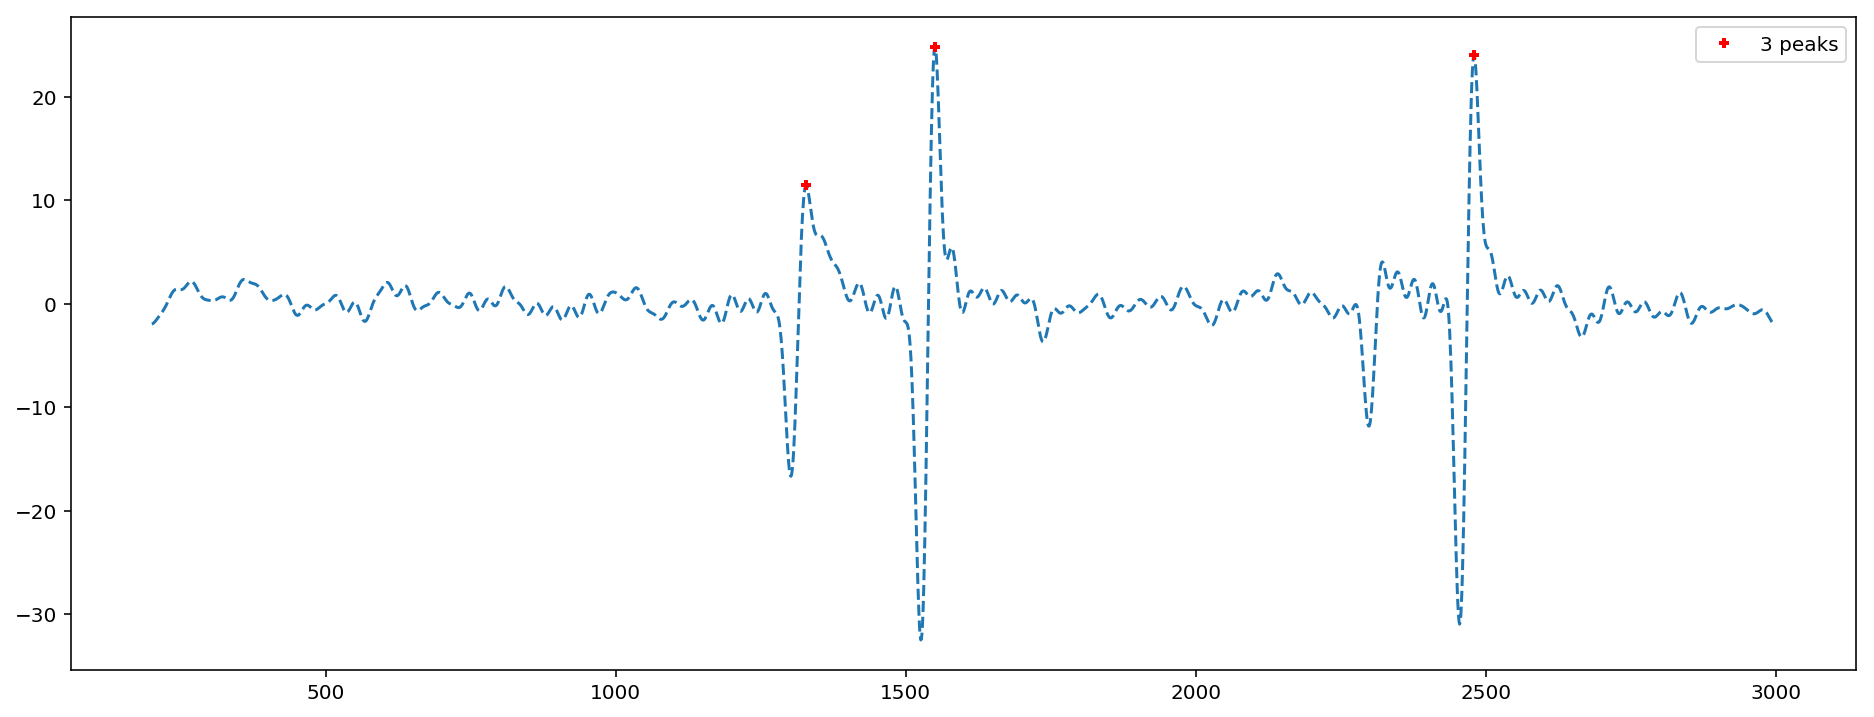

In [106]:
plt.figure(figsize=(16,6))
pplot(x[200:], y_ifft, indexes)